## Imports

In [19]:
## necessary imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Reading in the dataset:

In [3]:
nobel_laureate_data = 'data/nobel_latest.csv'

nobel_df = pd.read_csv(nobel_laureate_data)
nobel_df.head()

,Year,Laureate_Id,Firstname,Lastname,Category,Gender,Prize_Share,Motivation,Birth_Date,Birth_Country,Birth_City,Birth_Country_Code,Death_Date,Death_Country,Death_City,Death_Country_Code,Organization_Name,Organization_City,Organization_Country
0,1901,1,Wilhelm Conrad,Röntgen,physics,male,1,"""in recognition of the extraordinary services ...",1845-03-27,Prussia (now Germany),Lennep (now Remscheid),DE,10-02-1923,Germany,Munich,DE,Munich University,Munich,Germany
1,1901,293,Emil,von Behring,medicine,male,1,"""for his work on serum therapy especially its ...",1854-03-15,Prussia (now Poland),Hansdorf (now Lawice),PL,31-03-1917,Germany,Marburg,DE,Marburg University,Marburg,Germany
2,1901,462,Henry,Dunant,peace,male,2,"""for his humanitarian efforts to help wounded ...",1828-05-08,Switzerland,Geneva,CH,30-10-1910,Switzerland,Heiden,CH,NaN,NaN,NaN
3,1901,463,Frédéric,Passy,peace,male,2,"""for his lifelong work for international peace...",1822-05-20,France,Paris,FR,12-06-1912,France,Paris,FR,NaN,NaN,NaN
4,1901,569,Sully,Prudhomme,literature,male,1,"""in special recognition of his poetic composit...",1839-03-16,France,Paris,FR,07-09-1907,France,Châtenay,FR,NaN,NaN,NaN


## EDA

I ultimately want to import the data into Tableau and create a heatmap of their birthdates, thus, I want to check for nulls in the `Birth_Date` column.

In [12]:
# Checking for nulls in the `Birth_Date` column
nobel_df[nobel_df['Birth_Date'].isna()]

,Year,Laureate_Id,Firstname,Lastname,Category,Gender,Prize_Share,Motivation,Birth_Date,Birth_Country,Birth_City,Birth_Country_Code,Death_Date,Death_Country,Death_City,Death_Country_Code,Organization_Name,Organization_City,Organization_Country


Seems like there are non null values, which is perfect; no need for me to impute values.

From just a quick peruse at the dataset, a few questions come to mind:

1. Number of winners in each subject category
2. Number of winners in each birth country
3. Winner proportion by gender
    * Winner in each subject category by gender

To answer these questions, I will perform some simple aggregations and visualizations.

### Q1. Number of winners in each subject category

Using a [`seaborn.countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) seems to be the best way to answer my first question. I also use a helper function from [Stack Overlflow](https://stackoverflow.com/questions/35692781/plotting-percentage-in-seaborn-bar-plot) to include percentage annotations of each category in the countplot.

In [67]:
# Helper function from
# https://stackoverflow.com/questions/35692781/plotting-percentage-in-seaborn-bar-plot
# Annotates countplot with proportion at top
def count_plot_with_percent(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)

        # Position of annotation
        x = p.get_x() + p.get_width() / 2 - 0.225 # got these numbers from trial and error
        y = p.get_y() + p.get_height() + 1.5
        plot.annotate(percentage, (x, y), size=10)
    plt.show()

Calling the helper function and making the countplot:

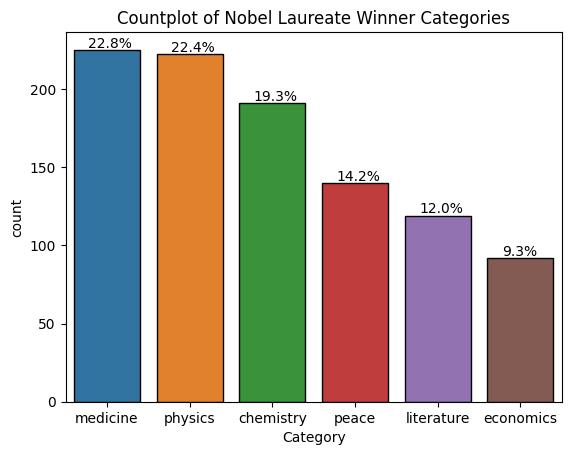

In [72]:
plt.title('Countplot of Nobel Laureate Winners by Category')
ax = sns.countplot(x=nobel_df['Category'],
                   order=nobel_df['Category'].value_counts().index, edgecolor='black') # order by desc

# Call helper function
count_plot_with_percent(ax, nobel_df.Category)

From a quick [wikipedia](https://en.wikipedia.org/wiki/Nobel_Prize) search, it appears that Nobel Prizes were originally only awarded in the fields of "Physics, Chemistry, Medicine, Literature, and Peace." In $1968$, the prize in "Economics" was established.

"Peace" is characterized by Alfred Nobel (the guy who came up with the prizes) as "to the person who has done the most or best to advance fellowship among nations, the abolition or reduction of standing armies, and the establishiment and promotion of peace congresses.

Some pretty interesting awards I guess. With this information known, I think it makes sense that economics contains the least proportion of awards since it was established much later ($67$ years the original conception).

Also find it pretty interesting that physics and medicine are largely tied, and then there's a relatively large dip in proportion in the next category of chemistry.

### Q2. Number of winners in each birth country

Code is going to be largely the same as Q1, but this time using the `Birth_Country_Code` column.

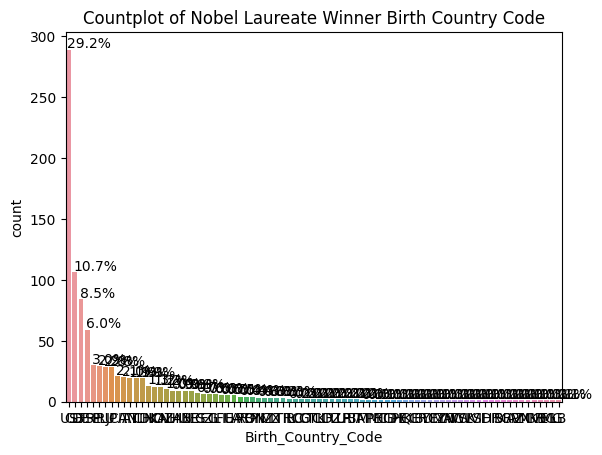

In [73]:
plt.title('Countplot of Nobel Laureate Winners Birth Country Code')
ax = sns.countplot(x=nobel_df['Birth_Country_Code'],
                   order=nobel_df['Birth_Country_Code'].value_counts().index) # order by desc

# Call helper function
count_plot_with_percent(ax, nobel_df.Birth_Country_Code)

Clearly there are too many birth countries to display succintly in a visualization. Thus, I will only display those in the *top $10$* countries with the most nobel laureates born and use that as a filter.

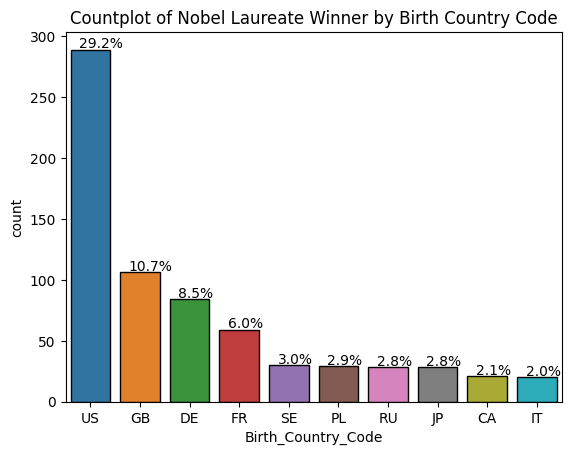

In [74]:
# get top 10
top_10_birth_countries = nobel_df['Birth_Country_Code'].value_counts().head(10).index

# filter
top_10_birth_countries_df = nobel_df[nobel_df["Birth_Country_Code"].isin(top_10_birth_countries)]

# plot again
plt.title('Countplot of Nobel Laureate Winners by Birth Country Code')
ax = sns.countplot(x=top_10_birth_countries_df['Birth_Country_Code'],
                   order=top_10_birth_countries_df['Birth_Country_Code'].value_counts().index,
                   edgecolor='black') # order by desc

# call helper function
count_plot_with_percent(ax, nobel_df.Birth_Country_Code) # note I use `nobel_df` to caclulate percentages

There seems to be an overwhelming majority of winners coming from the United States, triple the proporition of that of the runner-up, United Kingdom of Great Britian (GB). This is quite interesting to know, could this be because of the higher "visibility" of those living in the United States? Does this have any relationship with an individual's "Organization?" For example, are there more academic organizations in the United States, and thus higher visibility and likelihood of wining and Nobel Prize? These questions could be investigated in a future project.

### Q3i. Winner proportion by gender

And here it comes, the gender-related analysis. No doubt there are going to be more male winners than female winners, but I'm curious to see by how much.

Code will still stay largely the same, a seaborn countplot is probably still the best way to go.

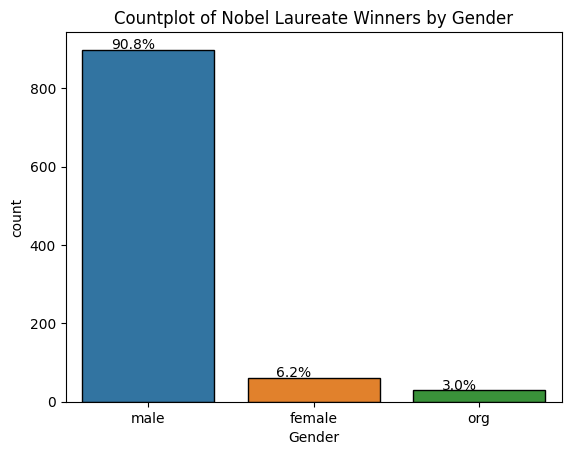

In [78]:
plt.title('Countplot of Nobel Laureate Winners by Gender')
ax = sns.countplot(x=nobel_df['Gender'],
                   order=nobel_df['Gender'].value_counts().index, edgecolor='black') # order by desc

# Call helper function
count_plot_with_percent(ax, nobel_df.Gender)

Well, no surprise that it is overwhelming male, $90.8\%$ to $6.2\%$ is *extremely* disproportionate though.

But what is this "org" label? Taking a closer look:

In [80]:
# Filter by org in Gender column
nobel_df[nobel_df['Gender']=='org'].head()

,Year,Laureate_Id,Firstname,Lastname,Category,Gender,Prize_Share,Motivation,Birth_Date,Birth_Country,Birth_City,Birth_Country_Code,Death_Date,Death_Country,Death_City,Death_Country_Code,Organization_Name,Organization_City,Organization_Country
22,1904,467,Institute of International Law,NaN,peace,org,1,"""for its striving in public law to develop pea...",1873-00-00,NaN,NaN,NaN,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN
58,1910,477,Permanent International Peace Bureau,NaN,peace,org,1,"""for acting as a link between the peace societ...",1891-00-00,NaN,NaN,NaN,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN
87,1917,482,International Committee of the Red Cross,NaN,peace,org,1,"""for the efforts to take care of wounded soldi...",1863-00-00,NaN,NaN,NaN,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,503,Nansen International Office for Refugees,NaN,peace,org,1,"""for having carried on the work of Fridtjof Na...",1921-00-00,NaN,NaN,NaN,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,482,International Committee of the Red Cross,NaN,peace,org,1,"""for the great work it has performed during th...",1863-00-00,NaN,NaN,NaN,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN


Seems like it just stands for "organization" or group. Today I learned organizations can also win Noble Peace prizes. Curious to see if any orgnization has one *multiple* awards:

In [88]:
nobel_df[nobel_df['Gender']=='org']['Firstname'].value_counts()[:5] # display the first 5

Firstname
International Committee of the Red Cross                       3
Office of the United Nations High Commissioner for Refugees    2
Institute of International Law                                 1
Doctors Without Borders                                        1
Center for Civil Liberties                                     1
Name: count, dtype: int64

Seems like although difficult, not impossible. Of all the organizations that have gotten Nobel Peace prizes, only $2$ have managed to win multiple.

Moving back to the gender analysis. I want to filter out these organizations to get a more accurate proportion.

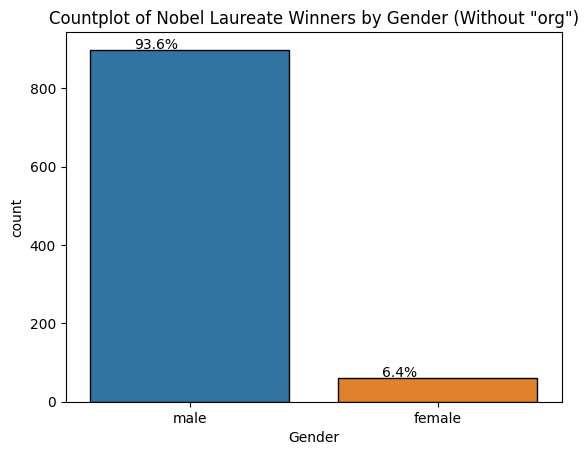

In [90]:
# filter out organizations
without_org_df = nobel_df[nobel_df['Gender']!='org']

plt.title('Countplot of Nobel Laureate Winners by Gender (Without "org")')
ax = sns.countplot(x=without_org_df['Gender'],
                   order=without_org_df['Gender'].value_counts().index, edgecolor='black') # order by desc

# Call helper function
count_plot_with_percent(ax, without_org_df.Gender)

Yup, the proportion gap is only wider (simple math can confirm this). There are nearly $15$ times more male Nobel Laureates than Female Laureates.

Checking who was the first female Nobel Laureate:

In [95]:
nobel_df[nobel_df['Gender']=='female'].sort_values('Year', ascending=True).head()[['Year', 'Firstname', 'Lastname',
                                                                                   'Category','Gender']]

,Year,Firstname,Lastname,Category,Gender
16,1903,Marie,Curie,physics,female
29,1905,Bertha,von Suttner,peace,female
52,1909,Selma,Lagerlöf,literature,female
64,1911,Marie,Curie,chemistry,female
129,1926,Grazia,Deledda,literature,female


$1903$! Well this is surprising. Considering the dataset starts at $1901$, a female received the Nobel Prize only $2$ years after. I was under the assumption that there was some gender inequality thing going on during those times. This doesn't imply there wasn't (there clearly was), but I just find it suprisingly that despite the largely male dominated norms back then, a woman was able to win a Nobel Prize so soon. Looking at the time between the Nobel Prize years, it seems like there are larger intervals of time in which women have not won a Nobel Prize, as shown by the large gap between $1911$ and $1926$ Looking into this further can maybe shed some more insight on why there is such a large proportion gap in Nobel Laureates between genders; another question that can be investigated in a future project.

### Q3ii. Winner in each subject category by gender

Using a seaborn countplot again, but this time adding in `Gender` as a `hue` variable:

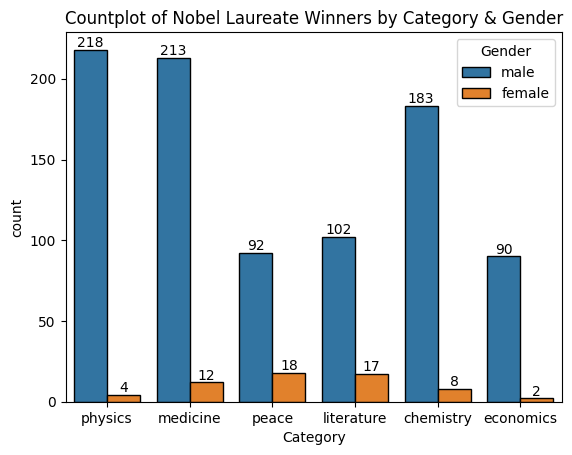

In [119]:
# filter out organizations
without_org_df = nobel_df[nobel_df['Gender']!='org']

# plot with hue='Gender'
plt.title('Countplot of Nobel Laureate Winners by Category & Gender')
ax = sns.countplot(x='Category', hue='Gender', data=without_org_df, edgecolor='black')

# add count labels
for label in ax.containers:
    ax.bar_label(label)

This countplot shows some very interesting trends. Yes, I have already shown that there are more male Nobel Laureates than female Nobel Laureates, but what is suprisingly is the difference in `Category` these laureates have received. If grouped by gender, it appears that women are *more likely* to receive prizes in "peace" and "literature" than men; men are more likely to have recieved prizes in "physics," "medicine," and "chemistry." Could this be a potential indicator for the disproportionate number of males in STEM careers and fields? Once again, this could be a question worth investigating.